In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
import scienceplots
import ast

os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
plt.style.use(['science', 'pgf'])
plt.rcParams.update({'font.size': 18})

pd.set_option('display.max_columns', 500)

In [3]:
responses_df = pd.read_csv('responses.csv')
users_df_likes = pd.read_csv('user_likes.csv')

In [29]:
cols = ['likes_per_step', 'target_likes_per_step', 'target_songs_per_step']

for c in cols:
    users_df_likes[c] = users_df_likes[c].apply(ast.literal_eval)
    
df_likes_expanded = users_df_likes.explode(['likes_per_step', 'target_likes_per_step', 'target_songs_per_step'], ignore_index=True)
df_likes_expanded['step'] = df_likes_expanded.groupby('user', observed=False).cumcount() + 1
df_likes_expanded

,user,user_group,liked_videos,recommended_playlists,target_genre,likes_per_step,target_likes_per_step,target_songs_per_step,step
0,0,BS,"895921, 1368880, 1127433, 1363563, 1376184, 85...","294, 295, 296, 297, 298, 299",R&B/Soul,4,4,20,1
1,0,BS,"895921, 1368880, 1127433, 1363563, 1376184, 85...","294, 295, 296, 297, 298, 299",R&B/Soul,4,4,20,2
2,0,BS,"895921, 1368880, 1127433, 1363563, 1376184, 85...","294, 295, 296, 297, 298, 299",R&B/Soul,2,2,20,3
3,0,BS,"895921, 1368880, 1127433, 1363563, 1376184, 85...","294, 295, 296, 297, 298, 299",R&B/Soul,2,2,20,4
4,0,BS,"895921, 1368880, 1127433, 1363563, 1376184, 85...","294, 295, 296, 297, 298, 299",R&B/Soul,1,1,20,5
...,...,...,...,...,...,...,...,...,...
121,19,SSP,"1155559, 1284825, 1397303, 1504844, 1336371, 8...","11, 155, 168, 169, 170, 171",Country,7,0,0,2
122,19,SSP,"1155559, 1284825, 1397303, 1504844, 1336371, 8...","11, 155, 168, 169, 170, 171",Country,10,1,1,3
123,19,SSP,"1155559, 1284825, 1397303, 1504844, 1336371, 8...","11, 155, 168, 169, 170, 171",Country,9,5,10,4
124,19,SSP,"1155559, 1284825, 1397303, 1504844, 1336371, 8...","11, 155, 168, 169, 170, 171",Country,11,9,17,5


In [30]:
responses_pivot = responses_df.pivot_table(index=['user', 'user_group', 'question__step'], columns='factor', values='response', aggfunc='mean').reset_index()
responses_pivot

factor,user,user_group,question__step,affinity,control,direction,helpfulness,personalization,understandability
0,0,BS,1,4.000000,3.333333,4.0,NaN,3.000000,3.000000
1,0,BS,2,4.333333,1.666667,3.0,NaN,3.000000,3.333333
2,0,BS,3,2.666667,3.000000,2.0,NaN,2.000000,1.666667
3,0,BS,4,2.000000,2.666667,2.5,NaN,1.666667,2.000000
4,0,BS,5,2.000000,2.000000,1.5,NaN,1.666667,4.000000
...,...,...,...,...,...,...,...,...,...
142,20,BS,3,1.000000,3.000000,1.0,NaN,1.000000,1.000000
143,20,BS,4,1.000000,3.000000,1.0,NaN,1.000000,1.000000
144,20,BS,5,2.000000,3.333333,2.0,NaN,1.333333,1.000000
145,20,BS,6,1.333333,1.000000,1.0,NaN,1.333333,1.000000


In [31]:
stats_df = df_likes_expanded.merge(responses_pivot, left_on=['user', 'step'], right_on=['user', 'question__step'], how='right').drop(columns=['step', 'user_group_x'])
stats_df = stats_df.rename(columns={'user_group_y': 'user_group', 'question__step': 'step', 'likes_per_step': 'likes', 'target_likes_per_step': 'target_likes', 'target_songs_per_step': 'target_songs'})
stats_df = stats_df[['user', 'user_group', 'step', 'likes', 'target_likes', 'target_songs', 'control', 'helpfulness', 'direction', 'personalization', 'understandability', 'affinity']]
stats_df

,user,user_group,step,likes,target_likes,target_songs,control,helpfulness,direction,personalization,understandability,affinity
0,0,BS,1,4,4,20,3.333333,NaN,4.0,3.000000,3.000000,4.000000
1,0,BS,2,4,4,20,1.666667,NaN,3.0,3.000000,3.333333,4.333333
2,0,BS,3,2,2,20,3.000000,NaN,2.0,2.000000,1.666667,2.666667
3,0,BS,4,2,2,20,2.666667,NaN,2.5,1.666667,2.000000,2.000000
4,0,BS,5,1,1,20,2.000000,NaN,1.5,1.666667,4.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
142,20,BS,3,1,1,20,3.000000,NaN,1.0,1.000000,1.000000,1.000000
143,20,BS,4,2,2,20,3.000000,NaN,1.0,1.000000,1.000000,1.000000
144,20,BS,5,3,3,20,3.333333,NaN,2.0,1.333333,1.000000,2.000000
145,20,BS,6,2,2,20,1.000000,NaN,1.0,1.333333,1.000000,1.333333


In [32]:
def custom_agg(x):
    if x.name in ['likes', 'target_likes', 'target_songs']:
        return x.sum()
    
    if x.name == 'affinity':
        return x.values[-2]
    
    return x.mean()

In [34]:
stats_df_agg = stats_df.groupby(['user', 'user_group'], observed=False).agg(custom_agg).drop(columns=['step']).reset_index()

duplicated_rows = stats_df_agg[stats_df_agg['user_group'].isin(['SSP', 'SSA'])].copy()
duplicated_rows['user_group'] = 'SSP+SSA'
stats_df_agg = pd.concat([stats_df_agg, duplicated_rows], ignore_index=True)

stats_df_agg['target_likes_songs_ratio'] = stats_df_agg['target_likes'] / stats_df_agg['target_songs']

stats_df_agg

,user,user_group,likes,target_likes,target_songs,control,helpfulness,direction,personalization,understandability,affinity,target_likes_songs_ratio
0,0,BS,14,14,120,2.666667,3.000000,2.500000,2.222222,3.000000,2.000000,0.116667
1,1,SSP,47,10,31,3.444444,5.000000,4.500000,4.444444,4.833333,5.000000,0.322581
2,2,SSA,46,17,38,4.000000,6.333333,5.083333,4.666667,5.166667,6.000000,0.447368
3,3,SSA,48,19,40,4.416667,6.000000,4.291667,4.555556,5.111111,5.666667,0.475000
4,4,BS,15,15,120,3.000000,3.333333,2.583333,2.277778,2.277778,1.666667,0.125000
5,5,BS,13,13,120,2.444444,2.666667,2.500000,2.166667,2.722222,1.666667,0.108333
6,6,SSP,31,4,50,3.666667,3.333333,3.083333,2.722222,2.611111,4.333333,0.080000
7,7,SSP,50,5,43,3.500000,6.333333,4.416667,4.222222,5.722222,5.333333,0.116279
8,8,SSP,45,15,36,4.166667,5.666667,5.583333,5.277778,5.388889,6.333333,0.416667
9,9,SSA,61,16,32,4.222222,6.666667,5.250000,5.333333,5.333333,6.333333,0.500000


In [37]:
stats_df_agg_agg = stats_df_agg.groupby('user_group', observed=False)[['likes', 'target_likes', 'target_songs', 'target_likes_songs_ratio', 'control', 'helpfulness', 'direction', 'personalization', 'understandability', 'affinity']].agg(['mean', 'std']).reset_index()
stats_df_agg_agg

user_group      likes            target_likes            target_songs  \
                   mean        std         mean        std         mean   
0         BS  14.333333  10.652073    14.333333  10.652073   120.000000   
1        SSA  47.714286  11.470459    14.000000   7.302967    37.142857   
2        SSP  42.250000   6.798109     9.625000   4.926242    37.375000   
3    SSP+SSA  44.800000   9.351852    11.666667   6.332080    37.266667   

            target_likes_songs_ratio             control            \
        std                     mean       std      mean       std   
0  0.000000                 0.119444  0.088767  2.888889  0.304290   
1  4.845223                 0.398037  0.223680  4.115079  0.295033   
2  9.303417                 0.279971  0.157311  3.743056  0.510850   
3  7.304271                 0.335069  0.193735  3.916667  0.452433   

  helpfulness           direction           personalization            \
         mean       std      mean       std            mean       std   
0    3.388889  1.143419  2.583333  0.619139        2.379630  0.594643   
1    6.095238  0.712697  5.136905  0.837045        4.761905  0.613392   
2    5.000000  1.553286  4.312500  1.360402        4.083333  1.226903   
3    5.511111  1.320574  4.697222  1.186112        4.400000  1.018177   

  understandability            affinity            
               mean       std      mean       std  
0          2.592593  0.448133  1.944444  0.574134  
1          5.507937  0.700844  5.190476  1.288944  
2          4.465278  1.408884  4.583333  1.318368  
3          4.951852  1.221837  4.866667  1.295903

## Check validity of response questions

In [38]:
def custom_agg2(x):
    if x.name in ['likes', 'target_likes', 'target_songs']:
        return x.sum()
    
    if x.name in ['I enjoy the music from [target taste].', 'My enjoyment of music from [target taste] has increased since the start of the experiment.', 'My enjoyment of music from [target taste] has increased since the previous step.']:
        return x.values[-2]
    
    return x.mean()

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import FactorAnalyzer
from IPython.display import display, HTML

def run_fa(responses_df, factor):
    filtered_df = responses_df[responses_df['factor'] == factor]

    questions_pivot = filtered_df.pivot_table(index=['user', 'user_group', 'question__step'], columns='question__text', values='response', aggfunc='mean').reset_index()

    ef_df = df_likes_expanded.merge(questions_pivot, left_on=['user', 'step'], right_on=['user', 'question__step'], how='right').drop(columns=['user', 'step', 'user_group_x'])
    ef_df = ef_df.rename(columns={'user_group_y': 'user_group', 'question__step': 'step', 'likes_per_step': 'likes', 'target_likes_per_step': 'target_likes', 'target_songs_per_step': 'target_songs'})
    ef_df = ef_df.drop(['liked_videos', 'recommended_playlists', 'target_genre', 'likes', 'target_likes'], axis=1)
    ef_df = ef_df.groupby(['user', 'user_group'], observed=False).agg(custom_agg2).drop(columns=['step']).reset_index()

    if factor == 'control':
        ef_df['The recommender allows only limited control to modify the recommendations.'] = ef_df['The recommender allows only limited control to modify the recommendations.'].apply(lambda x: 8.0 - x)

    ef_df.drop(columns=['user', 'user_group', 'target_songs'], axis=1, inplace=True)

    chi_square_value,p_value=calculate_bartlett_sphericity(ef_df)
    kmo = calculate_kmo(ef_df)
    print(f'Chi square value: {chi_square_value}, p-value: {p_value}')
    print(f'KMO: {kmo}')

    fa = FactorAnalyzer(1, rotation=None)
    fa.fit(ef_df)
    fa_loadings = fa.loadings_
    fa_loadings_binary = np.where(fa_loadings > 0.5, 1, 0)
    fa_loadings_binary_df = pd.DataFrame(fa_loadings_binary, index=ef_df.columns, columns=['factor1'])
    fa_loadings_df = pd.DataFrame(fa_loadings, index=ef_df.columns, columns=['factor1'])
    print(fa.get_factor_variance())
    display(HTML(fa_loadings_df.to_html()))

    

In [312]:
for factor in ['control', 'helpfulness', 'direction', 'personalization', 'understandability', 'affinity']:
    print(factor)
    run_fa(responses_df, factor)
    print('\n\n')

control
Chi square value: 53.76122482523932, p-value: 1.2616445295109116e-11
KMO: (array([0.58640844, 0.61071567, 0.8353567 ]), np.float64(0.6444399687658681))
(array([2.37186221]), array([0.79062074]), array([0.79062074]))


,factor1
I feel in control of modifying the recommendations.,-1.003737
I found it easy to modify the recommendations in the recommender.,-0.934986
The recommender allows only limited control to modify the recommendations.,-0.700125





helpfulness
Chi square value: 52.8859977882042, p-value: 1.9388876160957364e-11
KMO: (array([0.66456462, 0.91151403, 0.67113126]), np.float64(0.7241785864469927))
(array([2.49608775]), array([0.83202925]), array([0.83202925]))


,factor1
This approach is useful in exploring a new genre.,0.966767
This approach motivates me to more delve into the new genre.,0.803027
This approach supports me in getting to know the new genre.,0.957391





direction
Chi square value: 40.621210806819626, p-value: 1.847898364948594e-10
KMO: (array([0.5, 0.5]), np.float64(0.49999999999999994))
(array([1.88544312]), array([0.94272156]), array([0.94272156]))


,factor1
I can notice the recommendations going in the direction of the target.,0.970938
The recommended songs seem to be in between my preferences and the target.,0.970938





personalization
Chi square value: 55.706635345165274, p-value: 4.852299728537882e-12
KMO: (array([0.54219339, 0.51631698, 0.53579681]), np.float64(0.5296454546149565))
(array([2.36413349]), array([0.7880445]), array([0.7880445]))


,factor1
I feel like the recommended songs take my preferences into account.,-0.788951
I find the songs from the playlist appealing.,-1.023468
I would listen to the playlist again.,-0.833189





understandability
Chi square value: 77.64048581167006, p-value: 9.841386718778332e-17
KMO: (array([0.81446569, 0.68044512, 0.78179023]), np.float64(0.7530689488795338))
(array([2.77343057]), array([0.92447686]), array([0.92447686]))


,factor1
I understand how the recommended songs relate to my musical taste.,-0.940609
It is easy to grasp why I received these recommended songs.,-0.992570
The recommendation process is clear to me.,-0.950521





affinity
Chi square value: 45.75632242570307, p-value: 6.390056251775331e-10
KMO: (array([0.84001611, 0.72599992, 0.71450487]), np.float64(0.7537775127415162))
(array([2.45994987]), array([0.81998329]), array([0.81998329]))


,factor1
I enjoy the music from [target taste].,0.850489
My enjoyment of music from [target taste] has increased since the previous step.,0.926073
My enjoyment of music from [target taste] has increased since the start of the experiment.,0.937554


In [ ]:
def check_convergent_validity(responses_df, factor, control_group=False):

    duplicated_rows = responses_df[responses_df['user_group'].isin(['SSP', 'SSA'])].copy()
    duplicated_rows['user_group'] = 'SSP+SSA'
    responses_df = pd.concat([responses_df, duplicated_rows], ignore_index=True)

    user_group_order = ['BS', 'SSP+SSA', 'SSP', 'SSA']

    filtered_responses = responses_df[responses_df['factor'] == factor].dropna(subset=['response'])

    # Ensure the user_group column is a categorical type with the specified order
    filtered_responses['user_group'] = pd.Categorical(filtered_responses['user_group'], categories=user_group_order, ordered=True)

    if factor == 'affinity':
        filtered_responses = filtered_responses.groupby(['user', 'user_group', 'factor', 'question__text'], observed=False)['response'].agg(lambda x: x.values[0]).reset_index()
    else:
        filtered_responses = filtered_responses.groupby(['user', 'user_group', 'factor', 'question__text'], observed=False)['response'].mean().reset_index()

    if control_group:
        for user_group in user_group_order:
            corr = {}

            for q in filtered_responses['question__text'].unique():
                for q2 in filtered_responses['question__text'].unique():
                    if q != q2 and f'{q}-{q2}' not in corr and f'{q2}-{q}' not in corr:
                        corr[f'{q}-{q2}'] = filtered_responses[(filtered_responses['question__text'] == q) & (filtered_responses['user_group'] == user_group)]['response'].reset_index(drop=True).corr(filtered_responses[(filtered_responses['question__text'] == q2) & (filtered_responses['user_group'] == user_group)]['response'].reset_index(drop=True))
            print(f'Correlation for {user_group}: {np.mean(list(corr.values()))}')
            for key, value in corr.items():
                print(f'Correlation between {key}: {value}')
            ave = np.sum([corr**2 for corr in corr.values()]) / len(corr)
            print(f'Average Variance Extracted (AVE) for {user_group}: {ave}')
            print('_' * 100)
    
    filtered_responses = filtered_responses[filtered_responses['user_group'] != 'SSP+SSA']
    corr = {}
    for q in filtered_responses['question__text'].unique():
        for q2 in filtered_responses['question__text'].unique():
            if q != q2 and f'{q}-{q2}' not in corr and f'{q2}-{q}' not in corr:
                corr[f'{q}-{q2}'] = filtered_responses[filtered_responses['question__text'] == q]['response'].reset_index(drop=True).corr(filtered_responses[filtered_responses['question__text'] == q2]['response'].reset_index(drop=True))
    
    # print(f'Correlation overall: {np.mean(list(corr.values()))}')
    # for key, value in corr.items():
    #     print(f'Correlation between {key}: {value}')
    ave = np.sum([corr**2 for corr in corr.values()]) / len(corr)
    print(f'Average Variance Extracted (AVE): {ave}')

In [ ]:
def discriminant_validity(responses_df, factors):

    # factors = ['helpfulness', 'direction', 'personalization', 'understandability', 'affinity', 'control']

    ave_sqrt = {}

    for factor in factors:
        filtered_responses = responses_df[responses_df['factor'] == factor].dropna(subset=['response'])

        if factor == 'affinity':
            filtered_responses = filtered_responses.groupby(['user', 'user_group', 'factor', 'question__text'], observed=False)['response'].agg(lambda x: x.values[0]).reset_index()
        else:
            filtered_responses = filtered_responses.groupby(['user', 'user_group', 'factor', 'question__text'], observed=False)['response'].mean().reset_index()

        corr = {}
        for q in filtered_responses['question__text'].unique():
            for q2 in filtered_responses['question__text'].unique():
                if q != q2 and f'{q}-{q2}' not in corr and f'{q2}-{q}' not in corr:
                    corr[f'{q}-{q2}'] = filtered_responses[filtered_responses['question__text'] == q]['response'].reset_index(drop=True).corr(filtered_responses[filtered_responses['question__text'] == q2]['response'].reset_index(drop=True))
        
        # for key, value in corr.items():
        #         print(f'Correlation between {key}: {value}')
        
        ave = np.sum([corr**2 for corr in corr.values()]) / len(corr)
        # print(f'Average Variance Extracted (AVE) for {factor}: {ave}')
        # print(f'Square Root of AVE for {factor}: {np.sqrt(ave)}')
        ave_sqrt[factor] = np.sqrt(ave)
        # print('_' * 100)

    factor1 = factors[0]
    factor2 = factors[1]

    filtered_responses1 = responses_df[responses_df['factor'] == factor1].dropna(subset=['response'])
    if factor1 == 'affinity':
        filtered_responses1 = filtered_responses1.groupby(['user', 'user_group', 'factor', 'question__text'], observed=False)['response'].agg(lambda x: x.values[0]).reset_index()
    else:
        filtered_responses1 = filtered_responses1.groupby(['user', 'user_group', 'factor', 'question__text'], observed=False)['response'].mean().reset_index()
    
    filtered_responses1 = filtered_responses1.groupby(['user', 'user_group', 'factor'], observed=False)['response'].mean().reset_index()

    filtered_responses2 = responses_df[responses_df['factor'] == factor2].dropna(subset=['response'])
    if factor2 == 'affinity':
        filtered_responses2 = filtered_responses2.groupby(['user', 'user_group', 'factor', 'question__text'], observed=False)['response'].agg(lambda x: x.values[0]).reset_index()
    else:
        filtered_responses2 = filtered_responses2.groupby(['user', 'user_group', 'factor', 'question__text'], observed=False)['response'].mean().reset_index()
    
    filtered_responses2 = filtered_responses2.groupby(['user', 'user_group', 'factor'], observed=False)['response'].mean().reset_index()

    filtered_responses = pd.concat([filtered_responses1, filtered_responses2], ignore_index=True)

    corr = filtered_responses[filtered_responses['factor'] == factor1]['response'].reset_index(drop=True).corr(filtered_responses[filtered_responses['factor'] == factor2]['response'].reset_index(drop=True))
    
    print(f'Correlation between {factor1} and {factor2}: {corr}')
    print(f'Square Root of AVE for {factor1}: {ave_sqrt[factor1]}')
    print(f'Square Root of AVE for {factor2}: {ave_sqrt[factor2]}')
    if corr > ave_sqrt[factor1] or corr > ave_sqrt[factor2]:
        print('Construct validity is not supported!')

In [293]:
for factor in ['control', 'helpfulness', 'direction', 'personalization', 'understandability', 'affinity']:
    print(f'Convergent validity for {factor}')
    check_convergent_validity(responses_df, factor)
    print('_' * 100)

Convergent validity for control
Average Variance Extracted (AVE): 0.6141695904419129
____________________________________________________________________________________________________
Convergent validity for helpfulness
Average Variance Extracted (AVE): 0.6834868385737615
____________________________________________________________________________________________________
Convergent validity for direction
Average Variance Extracted (AVE): 0.8885320018844733
____________________________________________________________________________________________________
Convergent validity for personalization
Average Variance Extracted (AVE): 0.621267638124772
____________________________________________________________________________________________________
Convergent validity for understandability
Average Variance Extracted (AVE): 0.8543014935142049
____________________________________________________________________________________________________
Convergent validity for affinity
Average Varian

In [294]:
done = []
for factor1 in ['control', 'helpfulness', 'direction', 'personalization', 'understandability', 'affinity']:
    for factor2 in ['control', 'helpfulness', 'direction', 'personalization', 'understandability', 'affinity']:
        if factor1 != factor2 and (factor1, factor2) not in done and (factor2, factor1) not in done:
            done.append((factor1, factor2))
            print(f'Discriminant validity between {factor1} and {factor2}')
            discriminant_validity(responses_df, [factor1, factor2])
            print('_' * 100)

Discriminant validity between control and helpfulness
Correlation between control and helpfulness: 0.571212909996138
Square Root of AVE for control: 0.783689728426954
Square Root of AVE for helpfulness: 0.8267326282261765
____________________________________________________________________________________________________
Discriminant validity between control and direction
Correlation between control and direction: 0.7759385476565129
Square Root of AVE for control: 0.783689728426954
Square Root of AVE for direction: 0.9426197546648772
____________________________________________________________________________________________________
Discriminant validity between control and personalization
Correlation between control and personalization: 0.6241964814523828
Square Root of AVE for control: 0.783689728426954
Square Root of AVE for personalization: 0.7882053273892355
____________________________________________________________________________________________________
Discriminant validity b

In [117]:
check_convergent_validity(responses_df, 'personalization')

Correlation for BS: 0.7309758268261864
Correlation between I feel like the recommended songs take my preferences into account.-I find the songs from the playlist appealing.: 0.899423492565302
Correlation between I feel like the recommended songs take my preferences into account.-I would listen to the playlist again.: 0.5014263555555377
Correlation between I find the songs from the playlist appealing.-I would listen to the playlist again.: 0.7920776323577192
Average Variance Extracted (AVE) for BS: 0.5625926615684947
____________________________________________________________________________________________________
Correlation for SSP+SSA: 0.6224373853799278
Correlation between I feel like the recommended songs take my preferences into account.-I find the songs from the playlist appealing.: 0.639139842125275
Correlation between I feel like the recommended songs take my preferences into account.-I would listen to the playlist again.: 0.36527189397115717
Correlation between I find the so

/var/folders/20/h270rzf9637g4pthtmxg6_280000gn/T/ipykernel_94486/2768187985.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_responses = filtered_responses.groupby(['user__username', 'user_group', 'factor', 'question__text'])['response'].mean().reset_index()


In [879]:
import statsmodels.api as sm
from statsmodels.formula.api import ols, poisson, glm

for factor in ['likes', 'target_likes_songs_ratio', 'helpfulness', 'affinity', 'direction', 'personalization', 'control', 'understandability']:
    print(f'Linear regression for {factor}')
    
    group_bs = stats_df_agg[stats_df_agg['user_group'] == 'BS'][factor]
    group_ssp_ssa = stats_df_agg[stats_df_agg['user_group'].isin(['SSP', 'SSA'])][factor]
    group_ssp = stats_df_agg[stats_df_agg['user_group'] == 'SSP'][factor]
    group_ssa = stats_df_agg[stats_df_agg['user_group'] == 'SSA'][factor]

    # stats_step = stats_df_agg[stats_df_agg['user_group'].isin(['SSP', 'SSA'])]['step']
    stats_df_agg['step_size'] = stats_df_agg['user_group'].map({'BS': 0, 'SSP': 1, 'SSA': 1})
    stats_df_agg['interactive'] = stats_df_agg['user_group'].map({'BS': 0, 'SSP': 0, 'SSA': 1})
    
    if factor == 'likes':
        model = poisson(f'{factor} ~ step_size', data=stats_df_agg).fit()
    else:
        model = ols(f'{factor} ~ step_size', data=stats_df_agg).fit()
    print(f'BS vs SSP+SSA: intercept={model.params[0]}, err={model.bse[0]}, p-value={model.pvalues[0]}, slope={model.params[1]}, err={model.bse[1]}, p-value={model.pvalues[1]}')

    if factor == 'likes':
        model = poisson(f'{factor} ~ interactive', data=stats_df_agg[stats_df_agg['user_group'].isin(['SSP', 'SSA'])]).fit()
    else:
        model = ols(f'{factor} ~ interactive', data=stats_df_agg[stats_df_agg['user_group'].isin(['SSP', 'SSA'])]).fit()
    print(f'SSP vs SSA: intercept={model.params[0]}, err={model.bse[0]}, p-value={model.pvalues[0]}, slope={model.params[1]}, err={model.bse[1]}, p-value={model.pvalues[1]}')

    print('_' * 100)

    

Linear regression for likes
Optimization terminated successfully.
         Current function value: 4.352456
         Iterations 6
BS vs SSP+SSA: intercept=2.662587827025453, err=0.10783277320343841, p-value=1.3092129459608916e-134, slope=1.139620312395487, err=0.11452511608743043, p-value=2.5008087524984402e-23
Optimization terminated successfully.
         Current function value: 3.662880
         Iterations 4
SSP vs SSA: intercept=3.7436043538031827, err=0.054392829322042126, p-value=0.0, slope=0.12162649011820409, err=0.07715304179165401, p-value=0.11492637958805263
____________________________________________________________________________________________________
Linear regression for target_likes_songs_ratio
BS vs SSP+SSA: intercept=0.11944444444444433, err=0.07039131209374117, p-value=0.1060441873645041, slope=0.21562420611209193, err=0.08328812367672753, p-value=0.018006628568711533
SSP vs SSA: intercept=0.2799713635772999, err=0.06746964335756776, p-value=0.0011420974432849375

/var/folders/20/h270rzf9637g4pthtmxg6_280000gn/T/ipykernel_94486/1718087986.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'BS vs SSP+SSA: intercept={model.params[0]}, err={model.bse[0]}, p-value={model.pvalues[0]}, slope={model.params[1]}, err={model.bse[1]}, p-value={model.pvalues[1]}')
/var/folders/20/h270rzf9637g4pthtmxg6_280000gn/T/ipykernel_94486/1718087986.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'BS vs SSP+SSA: intercept={model.params[0]}, err={model.bse[0]}, p-value={model.pvalues[0]}, slope={model.params[1]}, err={model.bse[1]}, p-value={model.pvalues[1]}')
/var/folders/20/h2

In [848]:
model = ols(formula=f'helpfulness ~ direction', data=stats_agg_filtered)
result = model.fit()
print(result.summary())
# result.summary()
# results.params[0], result.pvalues, results.errors
results.bse

                            OLS Regression Results                            
Dep. Variable:            helpfulness   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     16.19
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           0.000726
Time:                        14:18:36   Log-Likelihood:                -32.488
No. Observations:                  21   AIC:                             68.98
Df Residuals:                      19   BIC:                             71.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8220      0.809      2.251      0.0

Intercept    0.809291
direction    0.187168
dtype: float64

In [761]:
model_total = smf.ols("personalization ~ direction", data=stats_agg_filtered).fit()
print(model_total.summary())

                            OLS Regression Results                            
Dep. Variable:        personalization   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     45.75
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.84e-06
Time:                        23:24:50   Log-Likelihood:                -21.914
No. Observations:                  21   AIC:                             47.83
Df Residuals:                      19   BIC:                             49.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6909      0.489      1.412      0.1

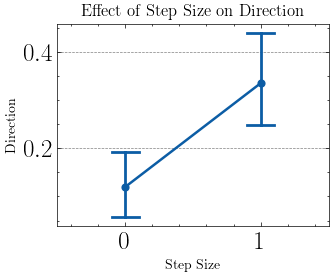

In [877]:
import seaborn as sns
import matplotlib.pyplot as plt

stats_agg_filtered = stats_df_agg[stats_df_agg['user_group'].isin(['BS', 'SSP', 'SSA'])].copy()
stats_agg_filtered['step_size'] = stats_agg_filtered['user_group'].map({'BS': 0, 'SSP': 1, 'SSA': 1})

# Step Size → Direction
# sns.regplot(x="step_size", y="target_likes_songs_ratio", data=stats_agg_filtered, label='user_group')
sns.pointplot(x="step_size", y="target_likes_songs_ratio", data=stats_agg_filtered, errorbar='ci', capsize=0.2, err_kws={'linewidth': 2})

plt.title("Effect of Step Size on Direction", fontsize=12)
plt.xlabel("Step Size", fontsize=10)
plt.ylabel("Direction", fontsize=10)
plt.show()

In [780]:
from sklearn.utils import resample
import numpy as np

# Define a function to calculate the indirect effect
def bootstrap_indirect_effect(data, osa, ssa, exp_int, n_bootstrap=1000):
    indirect_effects = []
    
    for _ in range(n_bootstrap):
        # Resample the data
        boot_data = resample(data)
        
        # Step 2: IV → Mediator (Path A)
        model_path_a = smf.ols(f"{exp_int} ~ {osa}", data=boot_data).fit()
        beta_a = model_path_a.params[osa]
        
        # Step 3: Mediator → DV (Path B, with IV included)
        model_path_b = smf.ols(f"{exp_int} ~ {osa} + {ssa}", data=boot_data).fit()
        beta_b = model_path_b.params[ssa]
        
        # Calculate indirect effect
        indirect_effect = beta_a * beta_b
        indirect_effects.append(indirect_effect)
    
    # Compute the mean and 95% confidence interval for the indirect effect
    indirect_mean = np.mean(indirect_effects)
    indirect_ci = np.percentile(indirect_effects, [2.5, 97.5])
    
    return indirect_mean, indirect_ci


In [893]:
# model = ols(formula=f'helpfulness ~ understandability', data=stats_agg_filtered).fit()
model = mixedlm(formula=f'helpfulness ~ personalization', data=stats_agg_filtered[stats_agg_filtered['user_group'].isin(['SSP', 'SSA'])], groups='interactive').fit()
print(model.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: helpfulness
No. Observations: 15      Method:             REML       
No. Groups:       2       Scale:              0.3449     
Min. group size:  7       Log-Likelihood:     -14.2203   
Max. group size:  8       Converged:          Yes        
Mean group size:  7.5                                    
---------------------------------------------------------
                 Coef. Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept        0.356    0.785 0.454 0.650 -1.183  1.895
personalization  1.172    0.173 6.754 0.000  0.832  1.512
interactive Var  0.000    0.120                          



/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
import statsmodels.formula.api as smf
from scipy.stats import norm

def mediation_test(osa, ssa, exp_int):

    if osa == 'step_size':
        stats_agg_filtered = stats_df_agg[stats_df_agg['user_group'].isin(['BS', 'SSP', 'SSA'])].copy()
        stats_agg_filtered['step_size'] = stats_agg_filtered['user_group'].map({'BS': 0, 'SSP': 1, 'SSA': 1})
    if osa == 'interactive':
        stats_agg_filtered = stats_df_agg[stats_df_agg['user_group'].isin(['SSP', 'SSA'])].copy()
        stats_agg_filtered['interactive'] = stats_agg_filtered['user_group'].map({'SSP': 0, 'SSA': 1})

    model_total = smf.ols(f"{exp_int} ~ {osa}", data=stats_agg_filtered).fit()
    # print(model_total.summary())
    print(f'{exp_int} ~ {osa}: intercept={model_total.params.iloc[0]}, err={model_total.bse.iloc[0]}, p-value={model_total.pvalues.iloc[0]}, slope={model_total.params.iloc[1]}, err={model_total.bse.iloc[1]}, p-value={model_total.pvalues.iloc[1]}')

    if ssa == 'likes':
        model_mediator = poisson(f'{ssa} ~ step_size', data=stats_agg_filtered).fit()
    else:
        model_mediator = smf.ols(f"{ssa} ~ {osa}", data=stats_agg_filtered).fit()
    # print(model_mediator.summary())
    print(f'{ssa} ~ {osa}: intercept={model_mediator.params.iloc[0]}, err={model_mediator.bse.iloc[0]}, p-value={model_mediator.pvalues.iloc[0]}, slope={model_mediator.params.iloc[1]}, err={model_mediator.bse.iloc[1]}, p-value={model_mediator.pvalues.iloc[1]}')


    model_direct = smf.ols(f"{exp_int} ~ {osa} + {ssa}", data=stats_agg_filtered).fit()
    print(model_direct.summary())
    print(f'{exp_int} ~ {osa} + {ssa}: {osa}={model_direct.params.iloc[1]}, err={model_direct.bse.iloc[1]}, p-value={model_direct.pvalues.iloc[1]}, {ssa}={model_direct.params.iloc[2]}, err={model_direct.bse.iloc[2]}, p-value={model_direct.pvalues.iloc[2]}')


    indirect_mean, indirect_ci = bootstrap_indirect_effect(stats_agg_filtered, osa, ssa, exp_int)
    print(f"Indirect Effect: {indirect_mean}")
    print(f"95% Confidence Interval: {indirect_ci}")

    se = (indirect_ci[1] - indirect_ci[0]) / (2 * 1.96)
    z_stat = indirect_mean / se
    p_value = 2 * norm.sf(np.abs(z_stat))

    print(f"Standard Error: {se}")
    print(f"P-value: {p_value}")

print('Mediation tests for helpfulness and step_size')
for ssa in ['direction', 'personalization', 'control', 'understandability', 'likes', 'target_likes_songs_ratio']:
    print(f'Mediation by {ssa}')
    mediation_test('step_size', ssa, 'helpfulness')
    print('_' * 100)

print('_' * 100)
print('Mediation tests for helpfulness and interactive')
for ssa in ['direction', 'personalization', 'control', 'understandability', 'likes', 'target_likes_songs_ratio']:
    print(f'Mediation by {ssa}')
    mediation_test('interactive', ssa, 'helpfulness')
    print('_' * 100)
# mediation_test('step_size', 'personalization', 'affinity')

Mediation tests for helpfulness and step_size
Mediation by direction
helpfulness ~ step_size: intercept=3.3888888888888875, err=0.5210637891704485, p-value=3.1323291298702194e-06, slope=2.1222222222222222, err=0.6165309897633141, p-value=0.002730763010913789
direction ~ step_size: intercept=2.5833333333333313, err=0.435414014327335, p-value=1.0353364438641255e-05, slope=2.113888888888889, err=0.5151888094880387, p-value=0.0006053982143136554
                            OLS Regression Results                            
Dep. Variable:            helpfulness   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     9.193
Date:                Wed, 27 Nov 2024   Prob (F-statistic):            0.00177
Time:                        19:02:34   Log-Likelihood:                -31.570
No. Observations:                  21   AIC:                             69.14
D

/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


Indirect Effect: 0.7896045822017277
95% Confidence Interval: [-0.1561628   2.32004247]
Standard Error: 0.631685016569594
P-value: 0.21130052378672948
____________________________________________________________________________________________________
Mediation by personalization
helpfulness ~ interactive: intercept=5.0, err=0.43783237853908374, p-value=3.777451994359354e-08, slope=1.0952380952380936, err=0.6409209752332824, p-value=0.11122760846786141
personalization ~ interactive: intercept=4.083333333333334, err=0.3507482746800314, p-value=3.003274630872616e-08, slope=0.678571428571428, err=0.5134429002702221, p-value=0.2090848577353726
                            OLS Regression Results                            
Dep. Variable:            helpfulness   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     29.70
Date:                Wed, 27 Nov 2024

/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


Indirect Effect: 1.2257294477850162
95% Confidence Interval: [0.04513181 2.85124285]
Standard Error: 0.7158446531698115
P-value: 0.08684431763726441
____________________________________________________________________________________________________
Mediation by control
helpfulness ~ interactive: intercept=5.0, err=0.43783237853908374, p-value=3.777451994359354e-08, slope=1.0952380952380936, err=0.6409209752332824, p-value=0.11122760846786141
control ~ interactive: intercept=3.6527777777777772, err=0.16946671124137094, p-value=1.474122726461462e-11, slope=0.4543650793650792, err=0.24807386379420282, p-value=0.09002008903007083
                            OLS Regression Results                            
Dep. Variable:            helpfulness   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     1.847
Date:                Wed, 27 Nov 2024   Prob (F-s

/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


Indirect Effect: 0.9278240220239428
95% Confidence Interval: [-0.87177814  4.71727657]
Standard Error: 1.4257792634938349
P-value: 0.5152087115299187
____________________________________________________________________________________________________
Mediation by understandability
helpfulness ~ interactive: intercept=5.0, err=0.43783237853908374, p-value=3.777451994359354e-08, slope=1.0952380952380936, err=0.6409209752332824, p-value=0.11122760846786141
understandability ~ interactive: intercept=4.465277777777778, err=0.40241776361302234, p-value=5.314534491730974e-08, slope=1.0426587301587287, err=0.589079287298601, p-value=0.10016445512061918
                            OLS Regression Results                            
Dep. Variable:            helpfulness   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     8.450
Date:                Wed, 27 No

/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


Indirect Effect: 0.9248406021091229
95% Confidence Interval: [-0.06107558  2.49820357]
Standard Error: 0.6528773335673708
P-value: 0.15661130268561335
____________________________________________________________________________________________________
Mediation by likes
helpfulness ~ interactive: intercept=5.0, err=0.43783237853908374, p-value=3.777451994359354e-08, slope=1.0952380952380936, err=0.6409209752332824, p-value=0.11122760846786141
Optimization terminated successfully.
         Current function value: 4.352456
         Iterations 6
likes ~ interactive: intercept=2.662587827025453, err=0.10783277320343841, p-value=1.3092129459608916e-134, slope=1.139620312395487, err=0.11452511608743043, p-value=2.5008087524984402e-23
                            OLS Regression Results                            
Dep. Variable:            helpfulness   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 L

/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


Indirect Effect: 0.12288201657789659
95% Confidence Interval: [0.00342385 0.34084239]
Standard Error: 0.08607615969257675
P-value: 0.15340805748192549
____________________________________________________________________________________________________
Mediation by target_likes_songs_ratio
helpfulness ~ interactive: intercept=5.0, err=0.43783237853908374, p-value=3.777451994359354e-08, slope=1.0952380952380936, err=0.6409209752332824, p-value=0.11122760846786141
target_likes_songs_ratio ~ interactive: intercept=0.2799713635772999, err=0.06746964335756776, p-value=0.0011420974432849375, slope=0.11806561495550653, err=0.09876544481169283, p-value=0.2532768555338914
                            OLS Regression Results                            
Dep. Variable:            helpfulness   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     5.182
Date:        

/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


Indirect Effect: 4.709743372308973
95% Confidence Interval: [ 0.05684887 13.48266287]
Standard Error: 3.4249525506240515
P-value: 0.16909219754622606
____________________________________________________________________________________________________


In [902]:
mediation_test('interactive', 'personalization', 'helpfulness')

helpfulness ~ interactive: intercept=5.0, err=0.43783237853908374, p-value=3.777451994359354e-08, slope=1.0952380952380936, err=0.6409209752332824, p-value=0.11122760846786141
personalization ~ interactive: intercept=4.083333333333334, err=0.3507482746800314, p-value=3.003274630872616e-08, slope=0.678571428571428, err=0.5134429002702221, p-value=0.2090848577353726
                            OLS Regression Results                            
Dep. Variable:            helpfulness   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     29.70
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           2.26e-05
Time:                        19:42:00   Log-Likelihood:                -11.563
No. Observations:                  15   AIC:                             29.13
Df Residuals:                      12   BIC:                             31.25
D

/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


Indirect Effect: 1.2278794501289607
95% Confidence Interval: [-0.01319253  2.77386456]
Standard Error: 0.7109839519060546
P-value: 0.08416509579081274


In [901]:
mediation_test('step_size', 'personalization', 'affinity')

affinity ~ step_size: intercept=1.9444444444444426, err=0.4697821374426332, p-value=0.0005577586913889911, slope=2.9222222222222225, err=0.5558537211571375, p-value=4.490676948741204e-05
personalization ~ step_size: intercept=2.379629629629628, err=0.377916545625311, p-value=4.809923861715868e-06, slope=2.0203703703703706, err=0.44715688705454926, p-value=0.00023523568557112136
                            OLS Regression Results                            
Dep. Variable:               affinity   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     37.53
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           3.79e-07
Time:                        19:41:03   Log-Likelihood:                -23.875
No. Observations:                  21   AIC:                             53.75
Df Residuals:                      18   BIC:                      

In [908]:
mediation_test('interactive', 'control', 'likes')

likes ~ interactive: intercept=42.25, err=3.271274409727233, p-value=8.610860553638635e-09, slope=5.464285714285706, err=4.788655402631214, p-value=0.2744176985074995
control ~ interactive: intercept=3.6527777777777772, err=0.16946671124137094, p-value=1.474122726461462e-11, slope=0.4543650793650792, err=0.24807386379420282, p-value=0.09002008903007083
                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.7056
Date:                Thu, 28 Nov 2024   Prob (F-statistic):              0.513
Time:                        12:09:02   Log-Likelihood:                -53.466
No. Observations:                  15   AIC:                             112.9
Df Residuals:                      12   BIC:                             115.1
Df Model:    

/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


Indirect Effect: -1.1156287435123926
95% Confidence Interval: [-81.67406495  87.81794579]
Standard Error: 43.23775784312409
P-value: 0.9794151169003399


In [894]:
print('Mediation tests for affinity and step_size')
for ssa in ['direction', 'personalization', 'control', 'understandability', 'likes', 'target_likes_songs_ratio']:
    print(f'Mediation by {ssa}')
    mediation_test('step_size', ssa, 'affinity')
    print('_' * 100)

print('_' * 100)
print('Mediation tests for affinity and interactive')
for ssa in ['direction', 'personalization', 'control', 'understandability', 'likes', 'target_likes_songs_ratio']:
    print(f'Mediation by {ssa}')
    mediation_test('interactive', ssa, 'affinity')
    print('_' * 100)

Mediation tests for affinity and step_size
Mediation by direction
affinity ~ step_size: intercept=1.9444444444444426, err=0.4697821374426332, p-value=0.0005577586913889911, slope=2.9222222222222225, err=0.5558537211571375, p-value=4.490676948741204e-05
direction ~ step_size: intercept=2.5833333333333313, err=0.435414014327335, p-value=1.0353364438641255e-05, slope=2.113888888888889, err=0.5151888094880387, p-value=0.0006053982143136554
affinity ~ step_size + direction: step_size=2.4815447523095857, err=0.7695208535750779, p-value=0.004699129076826183, direction=0.20846765987982835, err=0.24951459710424, p-value=0.41439332502671666
Indirect Effect: 0.39844633115590045
95% Confidence Interval: [-2.73663125  3.14526782]
Standard Error: 1.500484458618252
P-value: 0.7905895534160807
____________________________________________________________________________________________________
Mediation by personalization
affinity ~ step_size: intercept=1.9444444444444426, err=0.4697821374426332, p-val

In [759]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

predictors = stats_agg_filtered[['step_size', 'personalization']]
predictors['intercept'] = 1
vif = pd.DataFrame({
    'Variable': predictors.columns,
    'VIF': [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
})
print(vif)

          Variable        VIF
0        step_size   2.074456
1  personalization   2.074456
2        intercept  10.803674


/var/folders/20/h270rzf9637g4pthtmxg6_280000gn/T/ipykernel_94486/1086031512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors['intercept'] = 1


In [787]:
def indirect_effect_fn(data):
    # Step 2: IV → Mediator
    model_path_a = smf.ols("direction ~ step_size", data=data).fit()
    beta_a = model_path_a.params["step_size"]

    # Step 3: Mediator → DV
    model_path_b = smf.ols("helpfulness ~ step_size + direction", data=data).fit()
    beta_b = model_path_b.params["direction"]

    # Indirect effect
    return beta_a * beta_b

In [801]:
from scipy.special import erf
import numpy as np
from sklearn.utils import resample

def bca_bootstrap(data, indirect_effect_fn, n_bootstrap=1000, alpha=0.05):
    """
    BCa bootstrap for indirect effect confidence intervals.

    Parameters:
    - data: DataFrame with the original dataset.
    - indirect_effect_fn: Function to compute the indirect effect.
    - n_bootstrap: Number of bootstrap samples (default=1000).
    - alpha: Significance level (default=0.05, for 95% CI).

    Returns:
    - Original statistic, BCa confidence intervals.
    """
    # Step 1: Compute the original statistic
    theta_hat = indirect_effect_fn(data)

    # Step 2: Generate bootstrap samples and compute the statistic for each
    bootstrap_stats = []
    for _ in range(n_bootstrap):
        boot_data = resample(data)
        bootstrap_stats.append(indirect_effect_fn(boot_data))
    bootstrap_stats = np.array(bootstrap_stats)

    # Step 3: Compute bias correction factor (z0)
    prop_less_than_theta = np.mean(bootstrap_stats < theta_hat)
    z0 = np.percentile(np.random.normal(size=n_bootstrap), prop_less_than_theta * 100)

    # Step 4: Compute acceleration factor (a) using the jackknife method
    jackknife_stats = []
    n = len(data)
    for i in range(n):
        jackknife_data = data.drop(index=i)  # Leave-one-out sample
        jackknife_stats.append(indirect_effect_fn(jackknife_data))
    jackknife_stats = np.array(jackknife_stats)
    mean_jackknife = np.mean(jackknife_stats)
    a = np.sum((mean_jackknife - jackknife_stats) ** 3) / (
        6.0 * (np.sum((mean_jackknife - jackknife_stats) ** 2) ** 1.5)
    )

    # Step 5: Adjust percentile values using z0 and a
    z_alpha_low = z0 + (z0 + np.percentile(np.random.normal(size=n_bootstrap), alpha / 2)) / (
        1 - a * (z0 + np.percentile(np.random.normal(size=n_bootstrap), alpha / 2))
    )
    z_alpha_high = z0 + (z0 + np.percentile(np.random.normal(size=n_bootstrap), 1 - alpha / 2)) / (
        1 - a * (z0 + np.percentile(np.random.normal(size=n_bootstrap), 1 - alpha / 2))
    )
    p_low = (1 + erf(z_alpha_low / np.sqrt(2))) / 2
    p_high = (1 + erf(z_alpha_high / np.sqrt(2))) / 2
    ci_low = np.percentile(bootstrap_stats, p_low * 100)
    ci_high = np.percentile(bootstrap_stats, p_high * 100)

    print(bootstrap_stats[:10])  # Check the first 10 bootstrap estimates
    print(np.mean(bootstrap_stats), np.median(bootstrap_stats))  # Mean and median of bootstrap stats

    ci_percentile = np.percentile(bootstrap_stats, [2.5, 97.5])
    print(f"Percentile 95% CI: {ci_percentile}")

    plt.hist(bootstrap_stats, bins=30, alpha=0.7)
    plt.axvline(theta_hat, color='red', linestyle='--', label='Original Indirect Effect')
    plt.xlabel('Bootstrap Indirect Effects')
    plt.ylabel('Frequency')
    plt.title('Bootstrap Distribution of Indirect Effect')
    plt.legend()
    plt.show()


    return theta_hat, (ci_low, ci_high)


[1.05959588 2.48115079 0.70880984 1.91558566 1.35638077 0.99382677
 1.30237544 1.71948997 1.18027808 1.80183118]
0.7959765464857366 1.0974836999595279
Percentile 95% CI: [-1.88182676  2.0224318 ]


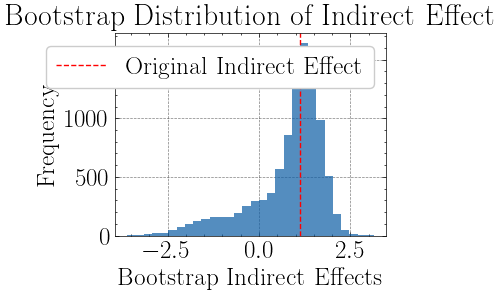

Indirect Effect: 1.1222513783718489
BCa 95% Confidence Interval: (np.float64(-2.450347716013075), np.float64(-1.7761009988206382))


In [802]:
stats_agg_filtered = stats_df_agg[stats_df_agg['user_group'].isin(['BS', 'SSP', 'SSA'])].copy()
stats_agg_filtered['step_size'] = stats_agg_filtered['user_group'].map({'BS': 0, 'SSP': 1, 'SSA': 1})
theta_hat, bca_ci = bca_bootstrap(stats_agg_filtered, indirect_effect_fn, n_bootstrap=10000, alpha=0.05)
print(f"Indirect Effect: {theta_hat}")
print(f"BCa 95% Confidence Interval: {bca_ci}")

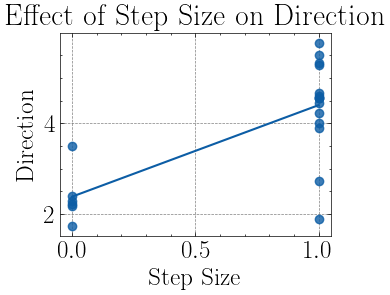

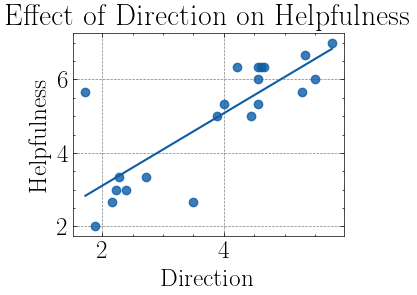

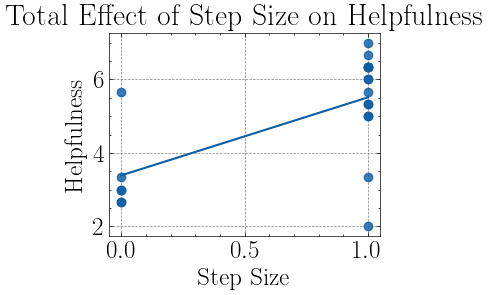

In [760]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step Size → Direction
sns.regplot(x="step_size", y="personalization", data=stats_agg_filtered, ci=None)
plt.title("Effect of Step Size on Direction")
plt.xlabel("Step Size")
plt.ylabel("Direction")
plt.show()

# Direction → Helpfulness
sns.regplot(x="personalization", y="helpfulness", data=stats_agg_filtered, ci=None)
plt.title("Effect of Direction on Helpfulness")
plt.xlabel("Direction")
plt.ylabel("Helpfulness")
plt.show()

# Step Size → Helpfulness
sns.regplot(x="step_size", y="helpfulness", data=stats_agg_filtered, ci=None)
plt.title("Total Effect of Step Size on Helpfulness")
plt.xlabel("Step Size")
plt.ylabel("Helpfulness")
plt.show()

In [725]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

stats_agg_filtered = stats_df_agg[stats_df_agg['user_group'].isin(['BS', 'SSP', 'SSA'])].copy()
stats_agg_filtered['step_size'] = stats_agg_filtered['user_group'].map({'BS': 0, 'SSP': 1, 'SSA': 1})

model = smf.ols('helpfulness ~ direction', data=stats_agg_filtered)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            helpfulness   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     16.19
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           0.000726
Time:                        21:54:12   Log-Likelihood:                -32.488
No. Observations:                  21   AIC:                             68.98
Df Residuals:                      19   BIC:                             71.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8220      0.809      2.251      0.0

In [ ]:
stats_agg_filtered = stats_df_agg[stats_df_agg['user_group'].isin(['SSP', 'SSA'])].copy()
stats_agg_filtered['interactive'] = stats_agg_filtered['user_group'].map({'SSP': 0, 'SSA': 1})

model = smf.ols('affinity ~ interactive', data=stats_agg_filtered)
results = model.fit()
print(results.summary())

In [369]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

likes_df = stats_df_agg[['user_group', 'likes', 'target_likes']]

likes_df = likes_df[likes_df['user_group'].isin(['BS', 'SSP', 'SSA'])]
likes_df['is_BS'] = (likes_df['user_group'] == 'BS').astype(int)

model = smf.poisson('likes ~ is_BS', data=likes_df)
nb_model = sm.GLM(likes_df['likes'], sm.add_constant(likes_df['is_BS']), family=sm.families.NegativeBinomial()).fit()
result = model.fit()
# print(result.summary())
rate_ratios = np.exp(result.params)
# print(f"Rate Ratios:\n{rate_ratios}")

print(nb_model.summary())

Optimization terminated successfully.
         Current function value: 4.352456
         Iterations 6
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  likes   No. Observations:                   21
Model:                            GLM   Df Residuals:                       19
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -94.379
Date:                Mon, 25 Nov 2024   Deviance:                       7.0574
Time:                        21:49:31   Pearson chi2:                     3.18
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1904
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [361]:
likes_df = likes_df[likes_df['user_group'].isin(['SSP', 'SSA'])]
likes_df['is_SSP'] = (likes_df['user_group'] == 'SSP').astype(int)

model = smf.poisson('likes ~ is_SSP', data=likes_df)
nb_model = sm.GLM(likes_df['likes'], sm.add_constant(likes_df['is_SSP']), family=sm.families.NegativeBinomial()).fit()
result = model.fit()
# print(result.summary())
rate_ratios = np.exp(result.params)
# print(f"Rate Ratios:\n{rate_ratios}")
print(nb_model.summary())

Optimization terminated successfully.
         Current function value: 3.662880
         Iterations 4
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  likes   No. Observations:                   15
Model:                            GLM   Df Residuals:                       13
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -72.172
Date:                Mon, 25 Nov 2024   Deviance:                      0.58422
Time:                        21:46:14   Pearson chi2:                    0.517
No. Iterations:                     4   Pseudo R-squ. (CS):           0.003603
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

/var/folders/20/h270rzf9637g4pthtmxg6_280000gn/T/ipykernel_94486/2697144712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  likes_df['is_SSP'] = (likes_df['user_group'] == 'SSP').astype(int)
/Users/alec.nonnemaker/Documents/Analysis/my_env/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [43]:
plt.style.use(['science', 'pgf', 'grid'])

In [ ]:
stats_df.groupby(['user', 'user_group'])['helpfulness'].agg(['mean', 'std']).reset_index()

,user,user_group,mean,std
0,0,BS,3.000000,NaN
1,1,SSP,5.000000,NaN
2,2,SSA,6.333333,NaN
3,3,SSA,6.000000,NaN
4,4,BS,3.333333,NaN
5,5,BS,2.666667,NaN
6,6,SSP,3.333333,NaN
7,7,SSP,6.333333,NaN
8,8,SSP,5.666667,NaN
9,9,SSA,6.666667,NaN


: 

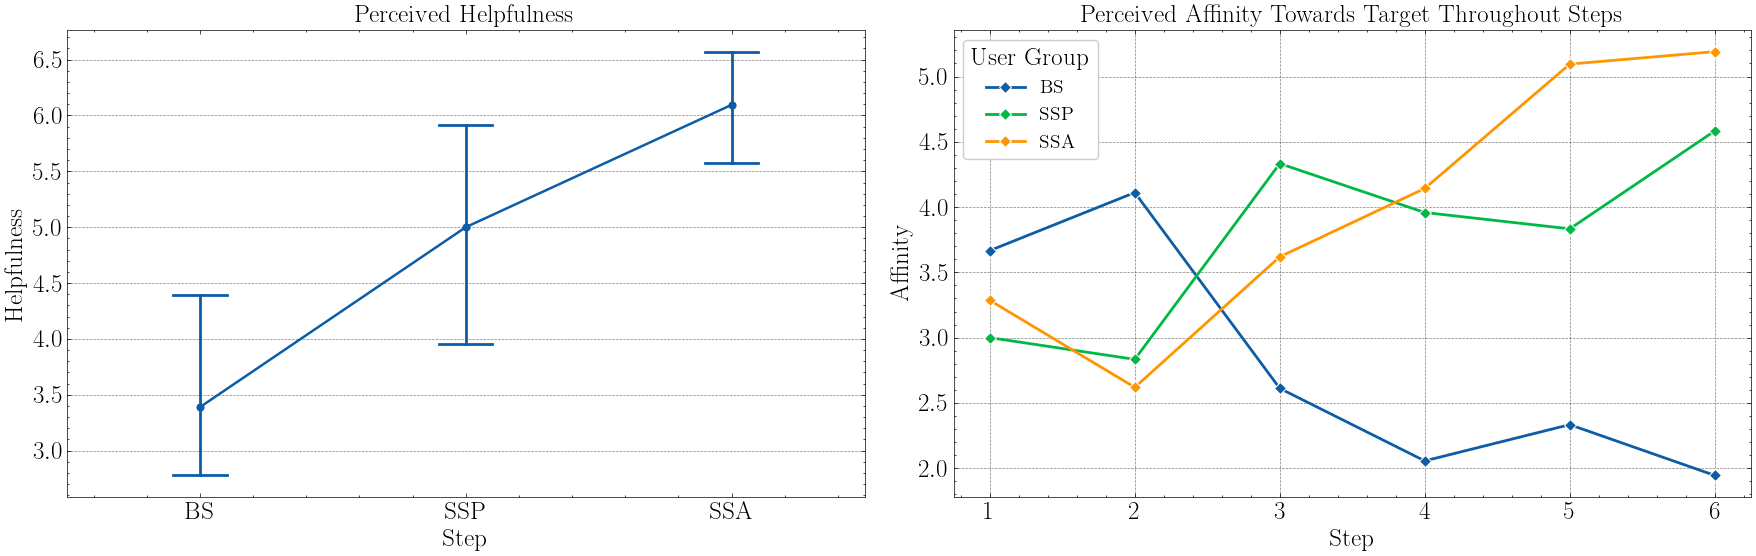

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

user_group_order = ['BS', 'SSP', 'SSA']

for i, measure in enumerate(['helpfulness', 'affinity']):

    if measure == 'helpfulness':
        filtered_df = stats_df.groupby(['user_group', 'user'])[measure].mean().reset_index()

        sns.pointplot(x=filtered_df['user_group'], y=filtered_df['helpfulness'], errorbar='ci', order=user_group_order, ax=axes[i], capsize=0.2, err_kws={'linewidth': 2})

    else:
        filtered_df = stats_df.groupby(['user_group', 'step'])[measure].mean().reset_index()

        sns.lineplot(x='step', y=measure, hue='user_group', data=filtered_df, hue_order=user_group_order, linewidth=2, marker='D', ax=axes[i])


axes[0].set_title('Perceived Helpfulness', fontsize=18)
axes[1].set_title('Perceived Affinity Towards Target Throughout Steps', fontsize=18)

axes[0].set_ylabel('Helpfulness')
axes[1].set_ylabel('Affinity')

axes[0].set_xlabel('Step')
axes[1].set_xlabel('Step')

# axes[0].legend(title='User Group', fontsize=14)
axes[1].legend(title='User Group', fontsize=14)

plt.tight_layout()
plt.savefig('perceived_helpfulness_affinity.pdf', dpi=300)
plt.show()

/var/folders/20/h270rzf9637g4pthtmxg6_280000gn/T/ipykernel_94486/2611933317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_group_df[measure] = user_group_df[measure].astype(int)
/var/folders/20/h270rzf9637g4pthtmxg6_280000gn/T/ipykernel_94486/2611933317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_group_df[measure] = user_group_df[measure].astype(int)
/var/folders/20/h270rzf9637g4pthtmxg6_280000gn/T/ipykernel_94486/2611933317.py:16: SettingWithCopyWarning: 
A value is trying to be se

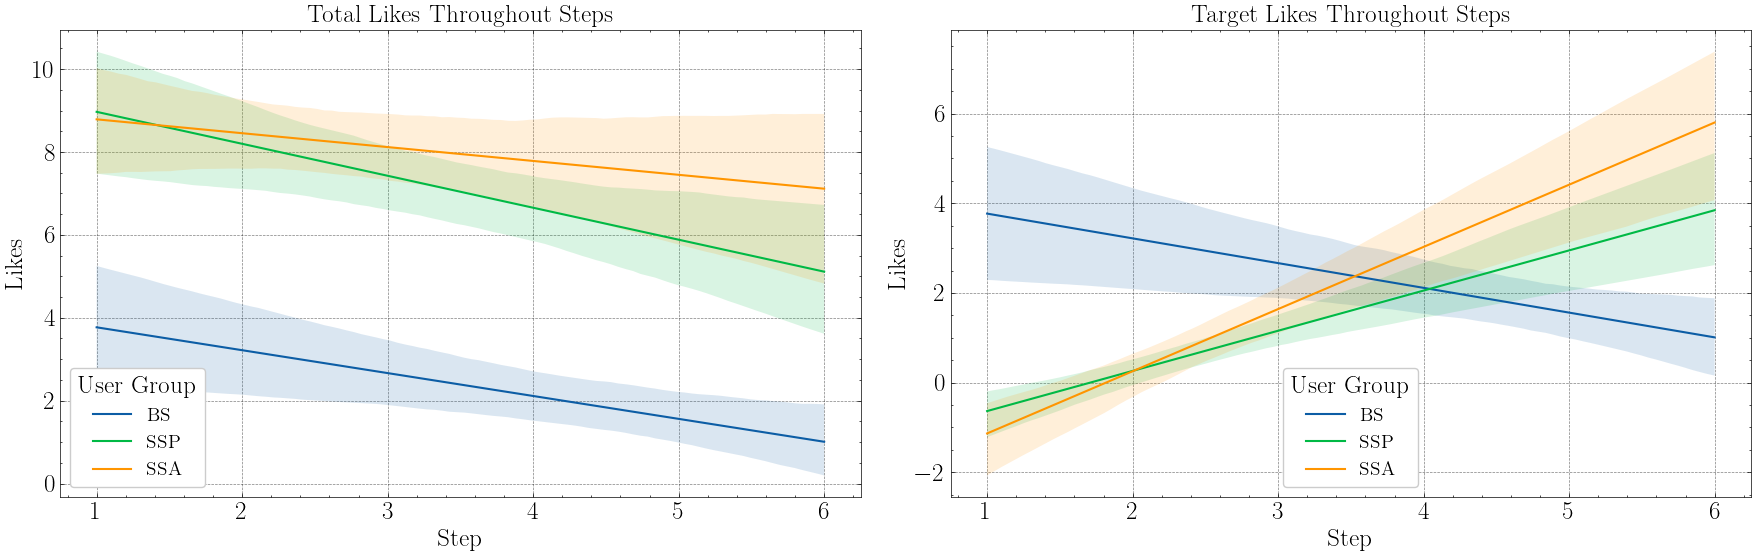

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

user_group_order = ['BS', 'SSP', 'SSA']

colors = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

for i, measure in enumerate(['likes', 'target_likes']):

    filtered_df = stats_df.groupby(['user_group', 'user', 'step'])[measure].mean().reset_index().dropna(subset=[measure])

    # sns.lineplot(x='step', y=measure, hue='user_group', data=filtered_df, hue_order=user_group_order, linewidth=2, marker='D', ax=axes[i])

    for j, user_group in enumerate(user_group_order):
        user_group_df = filtered_df[filtered_df['user_group'] == user_group]
        # sns.lineplot(x='step', y=measure, data=user_group_df, ax=axes[i], label=user_group, linewidth=2, marker='D')
        user_group_df[measure] = user_group_df[measure].astype(int)
        sns.regplot(x='step', y=measure, data=user_group_df, ax=axes[i], label=user_group, scatter=False, color=colors[j])

axes[0].set_title('Total Likes Throughout Steps', fontsize=18)
axes[1].set_title('Target Likes Throughout Steps', fontsize=18)

axes[0].set_ylabel('Likes')
axes[1].set_ylabel('Likes')

axes[0].set_xlabel('Step')
axes[1].set_xlabel('Step')

axes[0].legend(title='User Group', fontsize=14)
axes[1].legend(title='User Group', fontsize=14)

plt.tight_layout()
# plt.savefig('perceived_direction_personalization.pdf', dpi=300)
plt.show()

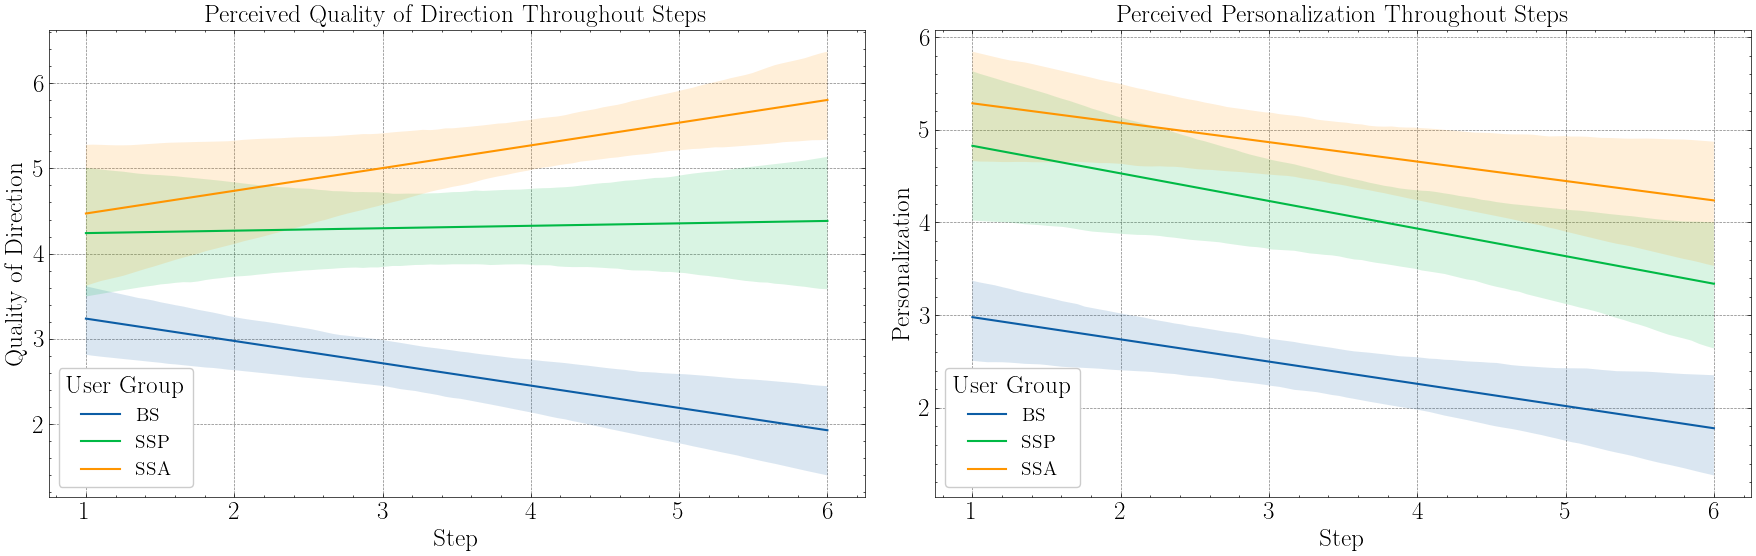

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

user_group_order = ['BS', 'SSP', 'SSA']

colors = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

for i, measure in enumerate(['direction', 'personalization']):

    filtered_df = stats_df.groupby(['user_group', 'user', 'step'])[measure].mean().reset_index()

    # sns.lineplot(x='step', y=measure, hue='user_group', data=filtered_df, hue_order=user_group_order, linewidth=2, marker='D', ax=axes[i])

    for j, user_group in enumerate(user_group_order):
        user_group_df = filtered_df[filtered_df['user_group'] == user_group]
        # sns.lineplot(x='step', y=measure, data=user_group_df, ax=axes[i], label=user_group, linewidth=2, marker='D')
        sns.regplot(x='step', y=measure, data=user_group_df, ax=axes[i], label=user_group, scatter=False, color=colors[j])

axes[0].set_title('Perceived Quality of Direction Throughout Steps', fontsize=18)
axes[1].set_title('Perceived Personalization Throughout Steps', fontsize=18)

axes[0].set_ylabel('Quality of Direction')
axes[1].set_ylabel('Personalization')

axes[0].set_xlabel('Step')
axes[1].set_xlabel('Step')

axes[0].legend(title='User Group', fontsize=14)
axes[1].legend(title='User Group', fontsize=14)

plt.tight_layout()
# plt.savefig('perceived_direction_personalization.pdf', dpi=300)
plt.show()

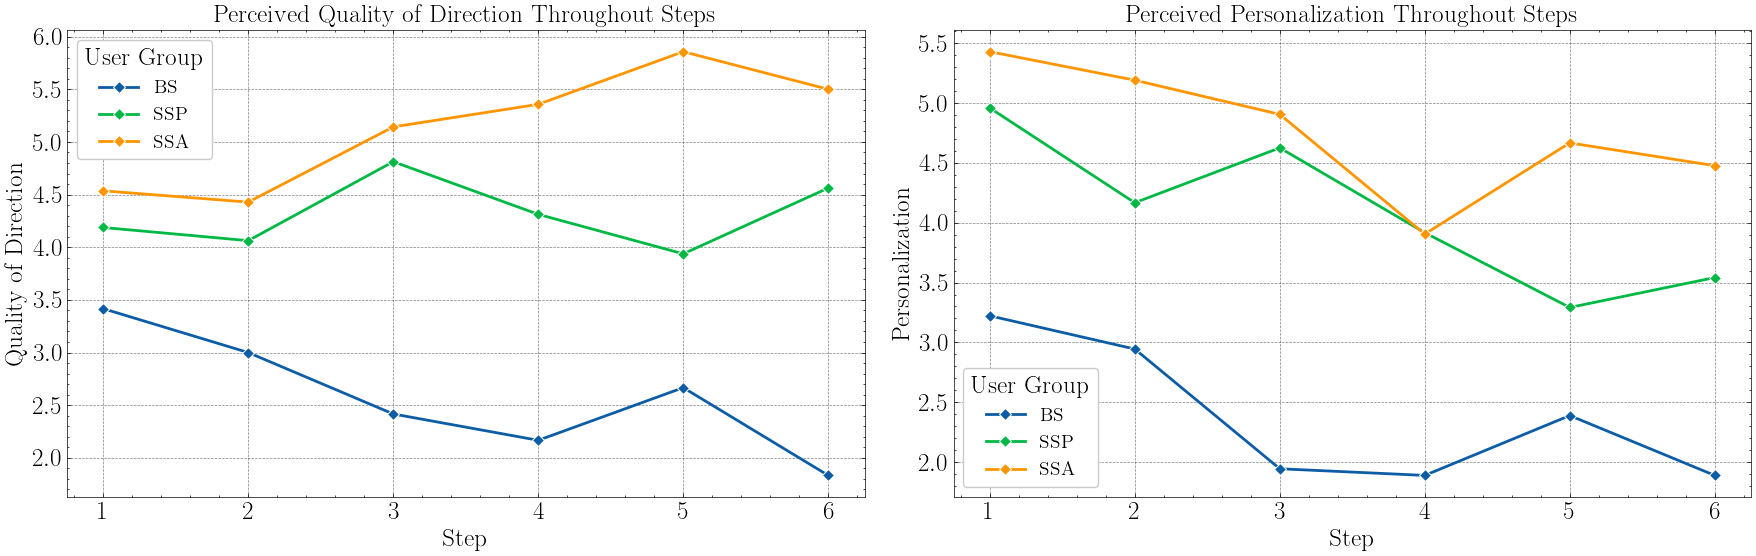

In [528]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

user_group_order = ['BS', 'SSP', 'SSA']

for i, measure in enumerate(['direction', 'personalization']):

    filtered_df = stats_df.groupby(['user_group', 'step'])[measure].mean().reset_index()

    sns.lineplot(x='step', y=measure, hue='user_group', data=filtered_df, hue_order=user_group_order, linewidth=2, marker='D', ax=axes[i])

axes[0].set_title('Perceived Quality of Direction Throughout Steps', fontsize=18)
axes[1].set_title('Perceived Personalization Throughout Steps', fontsize=18)

axes[0].set_ylabel('Quality of Direction')
axes[1].set_ylabel('Personalization')

axes[0].set_xlabel('Step')
axes[1].set_xlabel('Step')

axes[0].legend(title='User Group', fontsize=14)
axes[1].legend(title='User Group', fontsize=14)

plt.tight_layout()
plt.savefig('perceived_direction_personalization.pdf', dpi=300)
plt.show()

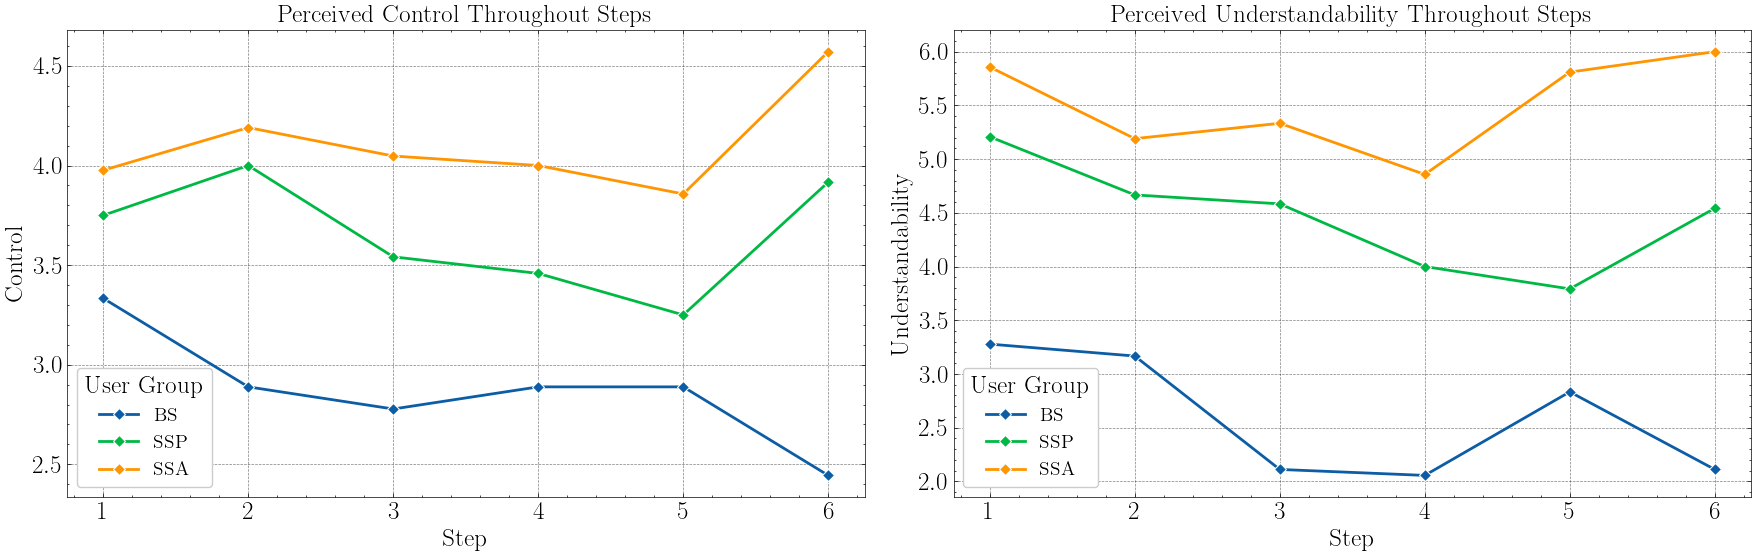

In [621]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

user_group_order = ['BS', 'SSP', 'SSA']

for i, measure in enumerate(['control', 'understandability']):

    filtered_df = stats_df.groupby(['user_group', 'step'])[measure].mean().reset_index()

    sns.lineplot(x='step', y=measure, hue='user_group', data=filtered_df, hue_order=user_group_order, linewidth=2, marker='D', ax=axes[i])

axes[0].set_title('Perceived Control Throughout Steps', fontsize=18)
axes[1].set_title('Perceived Understandability Throughout Steps', fontsize=18)

axes[0].set_ylabel('Control', fontsize=18)
axes[1].set_ylabel('Understandability', fontsize=18)

axes[0].set_xlabel('Step', fontsize=18)
axes[1].set_xlabel('Step', fontsize=18)

axes[0].legend(title='User Group', fontsize=14)
axes[1].legend(title='User Group', fontsize=14)

plt.tight_layout()
plt.savefig('perceived_control_understandability.pdf', dpi=300)
plt.show()

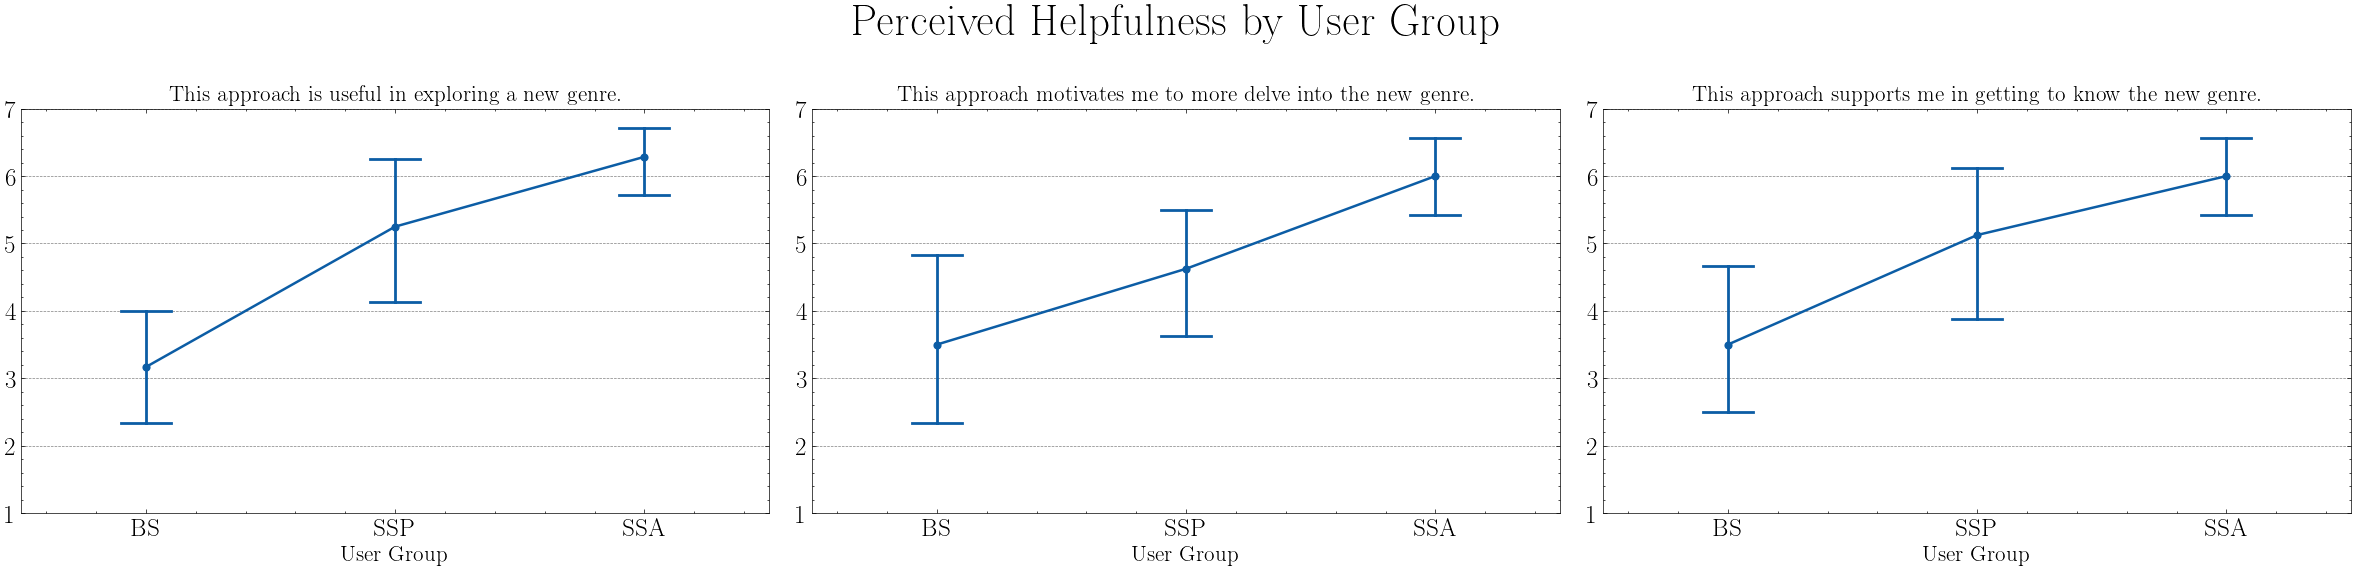

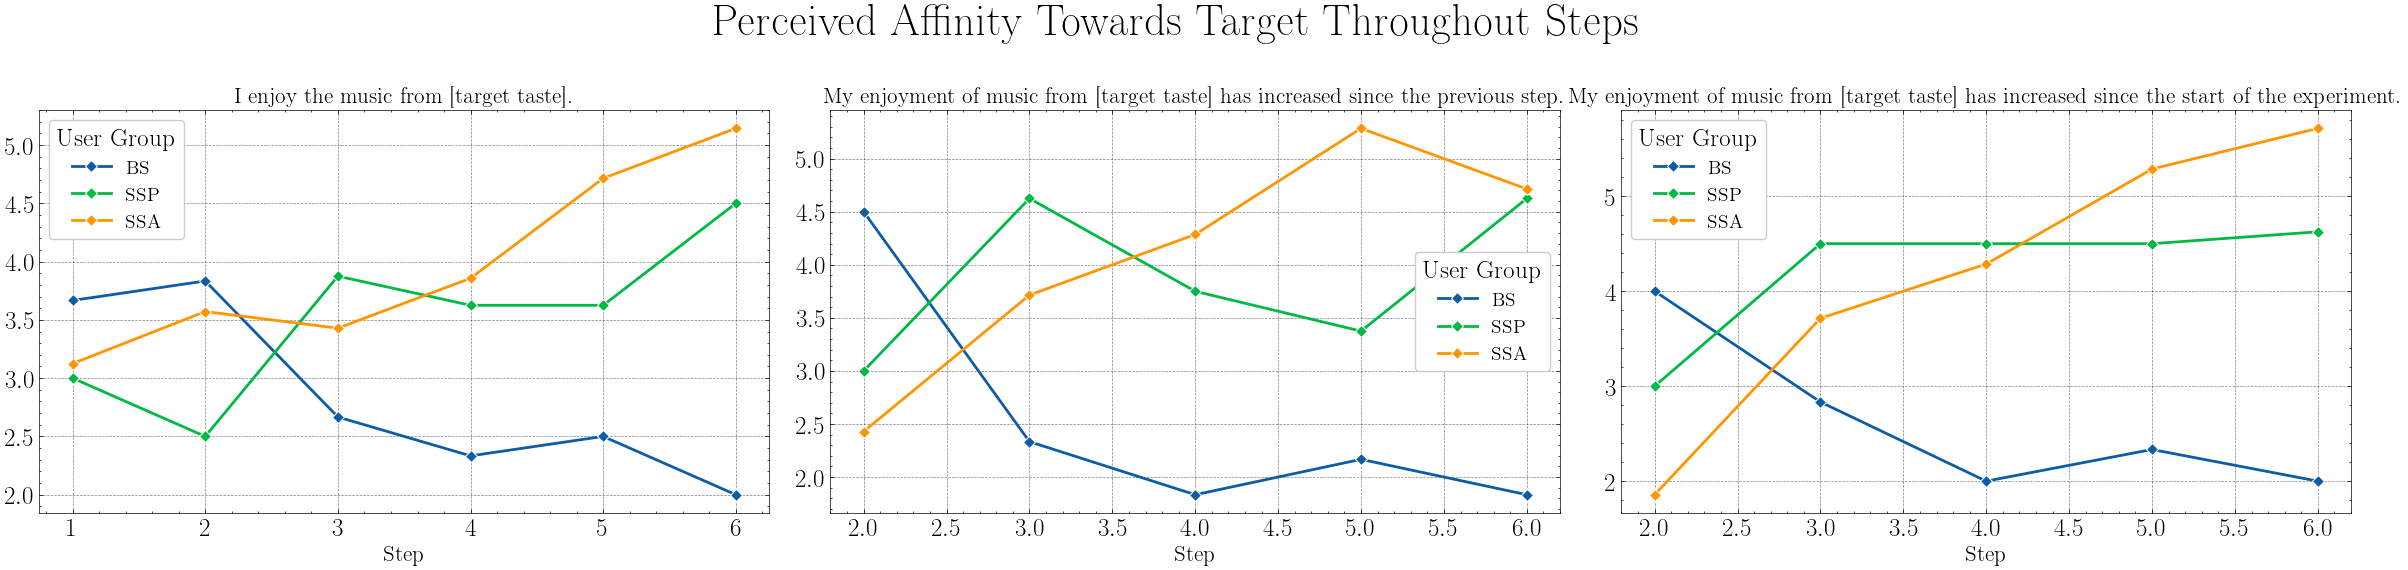

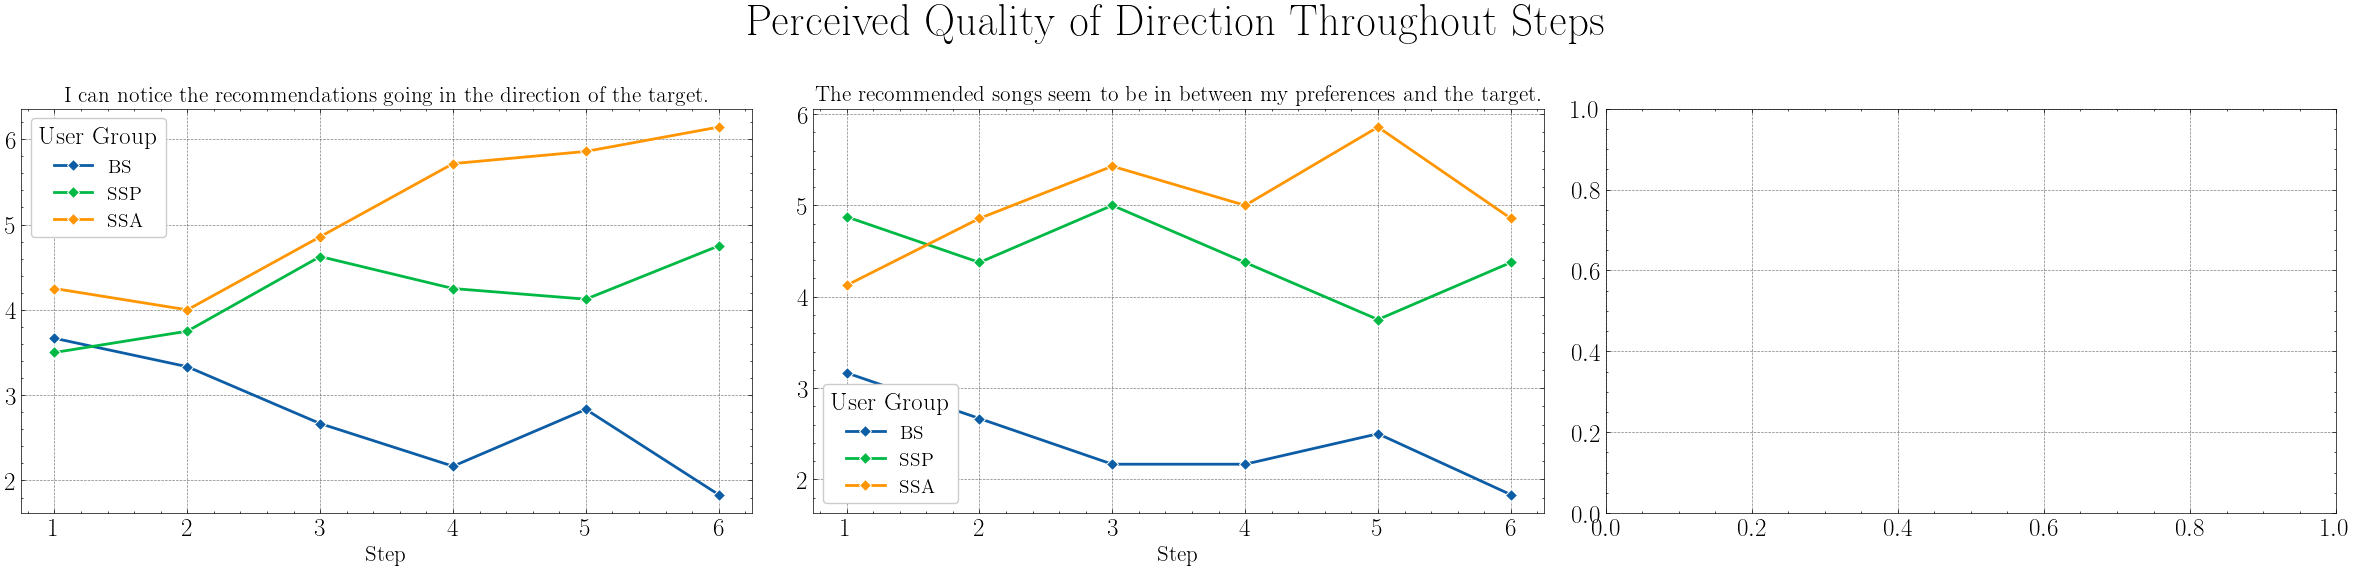

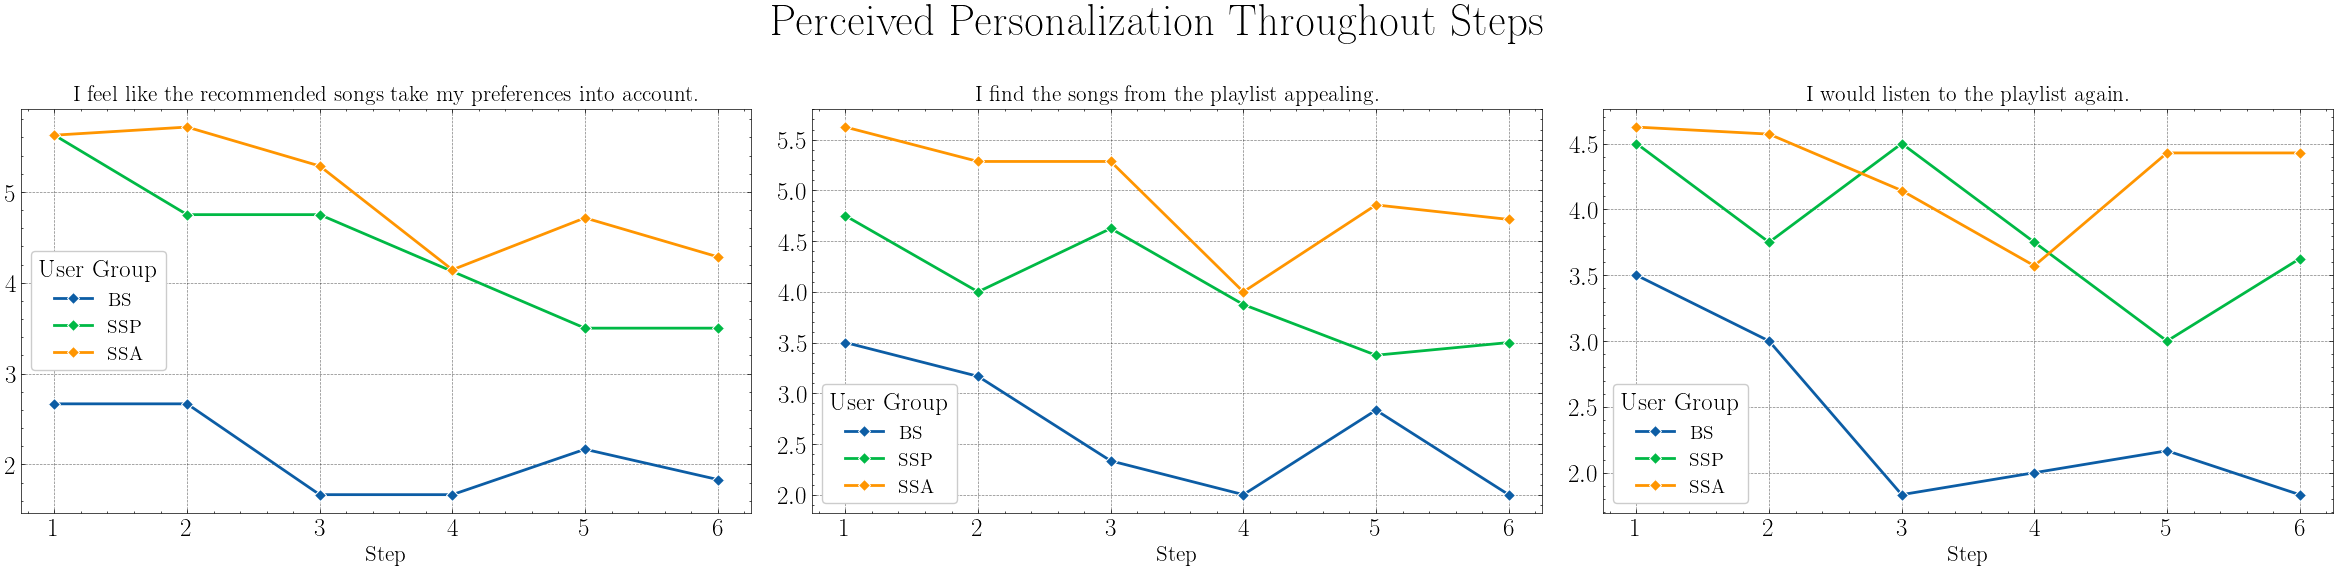

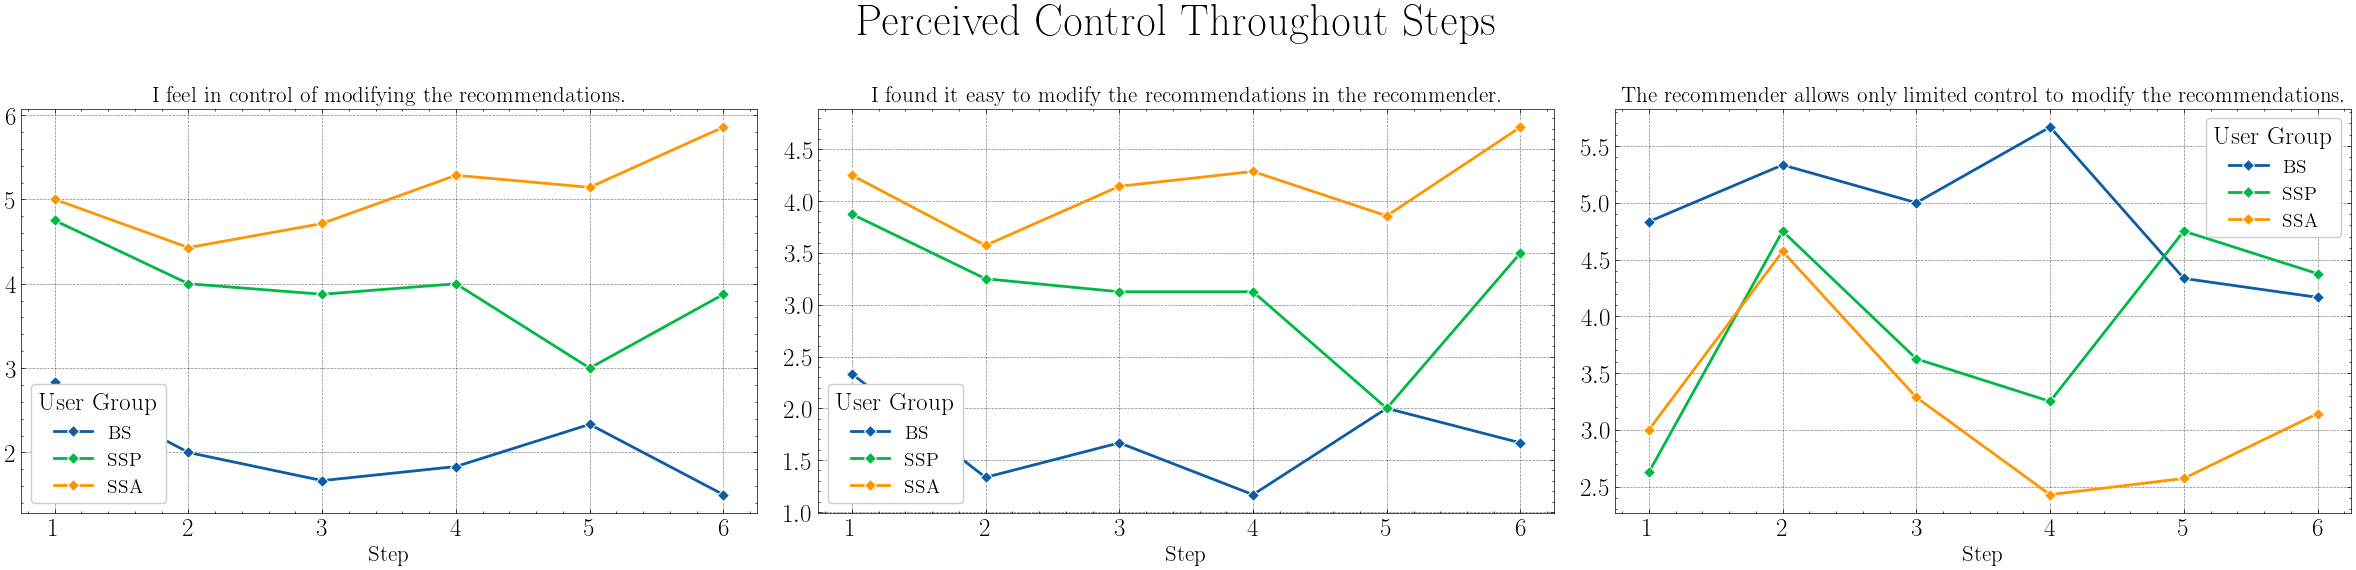

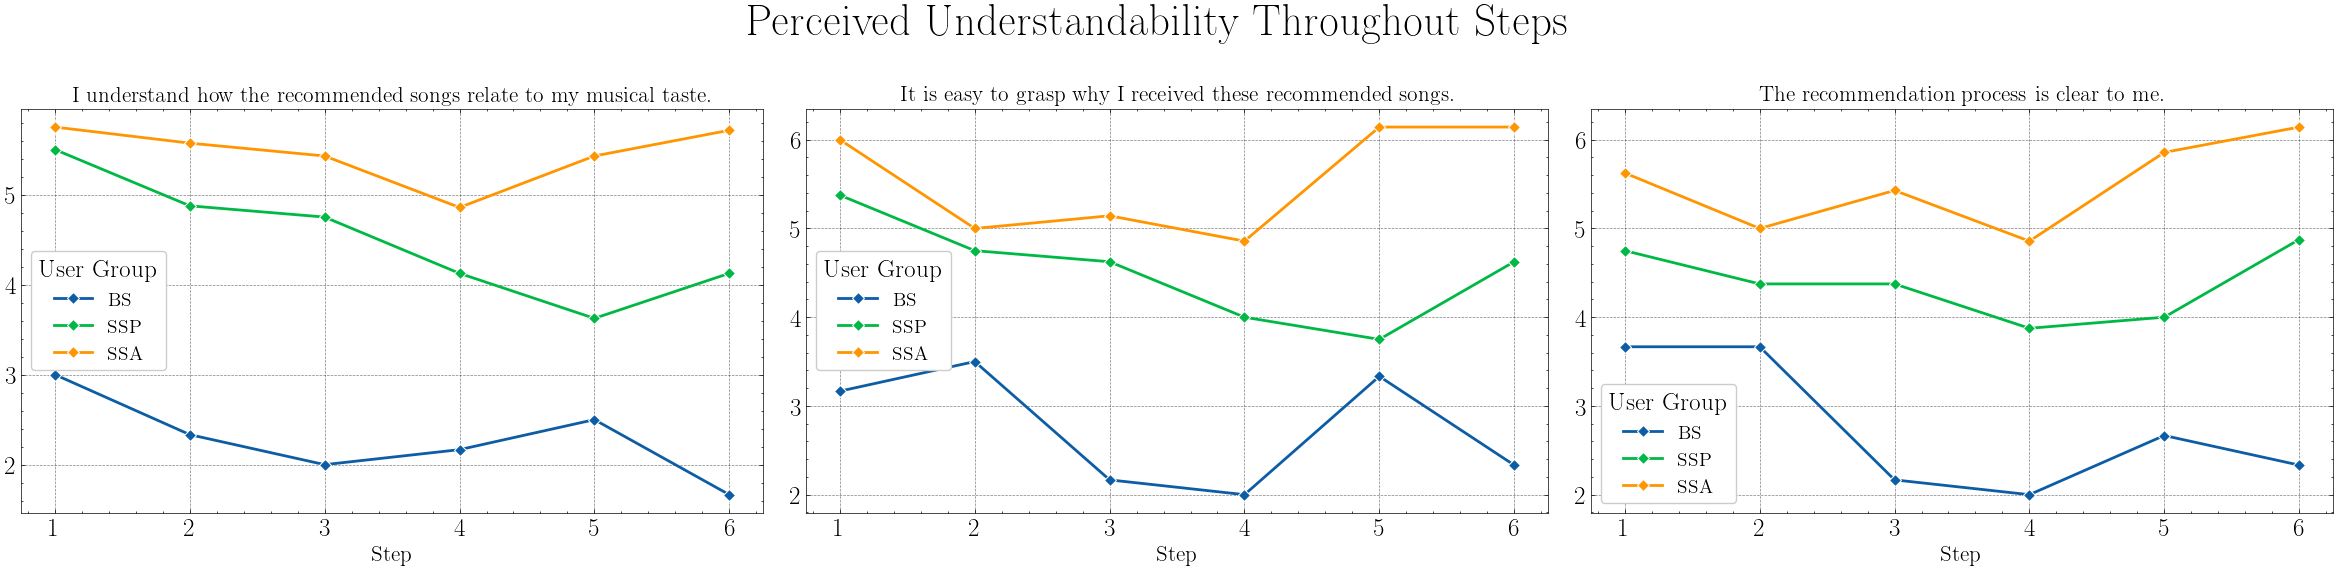

In [ ]:
# fig, axes = plt.subplots(6, 3, figsize=(27, 36))

user_group_order = ['BS', 'SSP', 'SSA']

for i, factor in enumerate(['helpfulness', 'affinity', 'direction', 'personalization', 'control', 'understandability']):

    fig, axes = plt.subplots(1, 3, figsize=(24, 6))

    filtered_df = responses_df[responses_df['factor'] == factor]

    if factor == 'helpfulness':
        # filtered_df = filtered_df.groupby(['user_group', 'question__text'], observed=False)['response'].mean().reset_index()
        grouped_df = filtered_df.groupby(['user_group', 'user', 'question__text'])['response'].mean().reset_index()

        for j, question in enumerate(grouped_df['question__text'].unique()):
            question_df = grouped_df[grouped_df['question__text'] == question]
            sns.pointplot(x=question_df['user_group'], y=question_df['response'], errorbar='ci', order=user_group_order, ax=axes[j], capsize=0.2, err_kws={'linewidth': 2})
            axes[j].set_title(question, fontsize=16)
            axes[j].set_xlabel('User Group', fontsize=16)
            axes[j].set_ylabel(None)
            axes[j].set_ylim(1, 7)
        
        fig.suptitle(f'Perceived {factor.capitalize()} by User Group', fontsize=32)
    
    else:
        grouped_df = filtered_df.groupby(['user_group', 'question__text', 'question__step'], observed=False)['response'].mean().reset_index()

        for j, question in enumerate(grouped_df['question__text'].unique()):
            question_df = grouped_df[grouped_df['question__text'] == question]
            sns.lineplot(x='question__step', y='response', hue='user_group', data=question_df, hue_order=user_group_order, linewidth=2, marker='D', ax=axes[j])
            if factor == 'affinity':
                axes[j].set_title(question, fontsize=10)
            axes[j].set_title(question, fontsize=16)
            axes[j].set_xlabel('Step', fontsize=16)
            axes[j].set_ylabel(None)
            axes[j].legend(title='User Group', fontsize=14)

        if factor == 'affinity':
            fig.suptitle(f'Perceived {factor.capitalize()} Towards Target Throughout Steps', fontsize=32)
        elif factor == 'direction':
            fig.suptitle(f'Perceived Quality of {factor.capitalize()} Throughout Steps', fontsize=32)
        else:
            fig.suptitle(f'Perceived {factor.capitalize()} Throughout Steps', fontsize=32)

# for ax, factor in zip(axes[:, 0], ['Helpfulness', 'Affinity Towards Target', 'Quality of Direction', 'Personalization', 'Control', 'Understandability']):
#     ax.set_ylabel(factor, rotation=90, size='large', fontweight=500, labelpad=50)

    plt.tight_layout()
    plt.savefig(f'individual_questions_{factor}.pdf', dpi=300)
    plt.show()
    # for i, user_group in enumerate(user_group_order):
    #     filtered_df = stats_df[stats_df['user_group'] == user_group]
    #     sns.lineplot(x='step', y=factor, data=filtered_df, ax=axes[i, user_group_order.index(user_group)], linewidth=2, marker='D')
    #     axes[i, user_group_order.index(user_group)].set_title(f'{factor} - {user_group}')